In [2]:
import numpy as np
import pandas as pd
import plotly.express as px

### Load Data

In [46]:
mars_weather_df = pd.read_csv("../local_datasets/mars_weather_data.csv")

### Clean Data

In [47]:
mars_weather_df.replace("--", np.nan, inplace=True)

In [48]:
mars_weather_df.head()

,Unnamed: 0,id,terrestrial_date,sol,ls,season,min_temp,max_temp,pressure,pressure_string,abs_humidity,wind_speed,wind_direction,atmo_opacity,sunrise,sunset,local_uv_irradiance_index,min_gts_temp,max_gts_temp
0,2977,1,2012-08-07,1,150,Month 6,NaN,NaN,NaN,Lower,NaN,NaN,NaN,Sunny,05:30,17:22,NaN,NaN,NaN
1,2976,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,Lower,NaN,NaN,NaN,Sunny,05:28,17:22,NaN,NaN,NaN
2,2975,2,2012-08-16,10,155,Month 6,-75,-16,739,Lower,NaN,NaN,NaN,Sunny,05:28,17:22,Very_High,-83,8
3,2974,13,2012-08-17,11,156,Month 6,-76,-11,740,Lower,NaN,NaN,NaN,Sunny,05:28,17:21,Very_High,-83,9
4,2973,24,2012-08-18,12,156,Month 6,-76,-18,741,Lower,NaN,NaN,NaN,Sunny,05:28,17:21,Very_High,-82,8


In [55]:
mars_weather_df.dropna(inplace=True, subset=["min_temp", "max_temp", "pressure", "min_gts_temp", "max_gts_temp"])

In [56]:
print(mars_weather_df.shape)

(2950, 19)


In [50]:
mars_weather_df.isnull().sum(axis=0)

Unnamed: 0                      0
id                              0
terrestrial_date                0
sol                             0
ls                              0
season                          0
min_temp                        0
max_temp                        0
pressure                        0
pressure_string                 0
abs_humidity                 2950
wind_speed                   2950
wind_direction               2950
atmo_opacity                    0
sunrise                         0
sunset                          0
local_uv_irradiance_index       0
min_gts_temp                    0
max_gts_temp                    0
dtype: int64

In [51]:
mars_weather_df[["min_temp", "max_temp", "pressure", "min_gts_temp", "max_gts_temp"]] = mars_weather_df[["min_temp", "max_temp", "pressure", "min_gts_temp", "max_gts_temp"]].apply(pd.to_numeric)

In [52]:
mars_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2950 entries, 2 to 2977
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 2950 non-null   int64  
 1   id                         2950 non-null   int64  
 2   terrestrial_date           2950 non-null   object 
 3   sol                        2950 non-null   int64  
 4   ls                         2950 non-null   int64  
 5   season                     2950 non-null   object 
 6   min_temp                   2950 non-null   int64  
 7   max_temp                   2950 non-null   int64  
 8   pressure                   2950 non-null   int64  
 9   pressure_string            2950 non-null   object 
 10  abs_humidity               0 non-null      float64
 11  wind_speed                 0 non-null      float64
 12  wind_direction             0 non-null      float64
 13  atmo_opacity               2950 non-null   objec

### Plot Cleaned Data

In [7]:
mars_weather_df_cleaned = pd.read_csv("../local_datasets/mars_weather_data_cleaned.csv")

In [10]:
mars_weather_df_cleaned.head()

,Unnamed: 0,id,terrestrial_date,sol,ls,season,min_temp,max_temp,pressure,pressure_string,abs_humidity,wind_speed,wind_direction,atmo_opacity,sunrise,sunset,local_uv_irradiance_index,min_gts_temp,max_gts_temp
0,2949,2,2012-08-16,10,155,Month 6,-75,-16,739,Lower,NaN,NaN,NaN,Sunny,05:28,17:22,Very_High,-83,8
1,2948,13,2012-08-17,11,156,Month 6,-76,-11,740,Lower,NaN,NaN,NaN,Sunny,05:28,17:21,Very_High,-83,9
2,2947,24,2012-08-18,12,156,Month 6,-76,-18,741,Lower,NaN,NaN,NaN,Sunny,05:28,17:21,Very_High,-82,8
3,2946,35,2012-08-19,13,157,Month 6,-74,-15,732,Lower,NaN,NaN,NaN,Sunny,05:28,17:21,Very_High,-80,8
4,2945,46,2012-08-20,14,157,Month 6,-74,-16,740,Lower,NaN,NaN,NaN,Sunny,05:27,17:21,Very_High,-82,9


<AxesSubplot:>

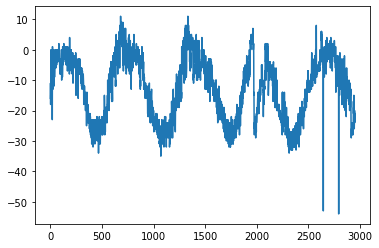

In [8]:
mars_weather_df_cleaned.max_temp.plot()

In [19]:
fig = px.line(mars_weather_df_cleaned, 
              x="terrestrial_date", 
              y=["min_temp", "max_temp"], 
              labels= {
                  "terrestrial_date": "Date",
                  "value": "Temperature"
              }
             )

fig.show()

In [18]:
fig = px.scatter(mars_weather_df_cleaned, 
              x="terrestrial_date", 
              y=["min_temp", "max_temp"], 
              labels= {
                  "terrestrial_date": "Date",
                  "value": "Temperature"
              },
              color="pressure"
             )

fig.show()